In [0]:
# Notes for 1jun2023

# mapbox data is car traffic on streets
# safegraph data is the same
# census safegraph data is the same
# the requested targets are in the targets table

# Compute is expensive, storage is not. Build little pieces and save them out. Don't rerun code if you can help it...

In [0]:
spark.sql("CREATE DATABASE tate_k")

Out[2]: DataFrame[]

In [0]:
# ALAND census.tract_spacial - sum up all land

# safegraph.spatial - geometry 

# the above are the tables to look through to find the coordinates of the businesses for distance calculations. (learn to use Sedona for this, it optimizes the calcs) 

# Sedona is like geopandas for Spark - workspace examples spatial section

In [0]:
data = spark.sql("""
    SELECT target_table.*, (beverage_target.count_bev/tract_spatial.ALAND)*1000*1000 AS beverage_density_sqkm
    FROM build_target_sp23.target_table
    JOIN census.tract_spatial ON build_target_sp23.target_table.tractcode = census.tract_spatial.GEOID
    JOIN build_target_sp23.beverage_target ON build_target_sp23.beverage_target.tractcode = census.tract_spatial.GEOID 
    """)

display(data)

tractcode gym_median_annual bev_median_annual har_median_annual mex_median_annual beverage_density_sqkm 48439113809 47733.60984484416 1390.1188901273415 2962.790393380312 0.0 0.4022243003811075 48167721201 20530.309274099236 15847.355347451692 0.0 14888.294982535119 0.3883650994408837 48167722001 0.0 8865.18652341293 0.0 0.0 0.11867044481717513 48201550302 134326.1933806848 38062.96814166719 0.0 21625.682276810323 0.4506463395124457 48157675800 0.0 9127.18154797168 89220.79509657448 88550.57330111164 0.0031091326484052983 48157670800 29751.353533527305 3724.8164542304276 0.0 6317.018238184381 0.2733565768430623 48157675700 24466.092466241207 72508.75245770733 0.0 2677.2118264781193 0.004280017252578344 48157673200 1004.980174256606 13103.187530872085 10936.271797336261 14889.985830536461 0.025121443547816393 48157673400 25430.617543181015 26247.05231360703 0.0 26504.3763558973 0.011510786331972599 48157673300 5977.511227547568 43117.043545690154 0.0 0.0 0.008218261239458435 48201553403 10425.89167595506 11521.196380226549 0.0 864.1471980692577 0.45349239024652754 48201541601 0.0 10703.915453980528 0.0 17413.987881358044 0.2189957337441109 48201541602 54164.58557976637 12031.108551073463 0.0 11341.91910946741 1.1837354745792805 48373210400 0.0 31972.734472928852 0.0 7842.941106871179 0.001293176783662379 48157670700 0.0 6947.749141837156 0.0 0.0 0.03442370534767787 48201455102 18254.36309594336 9475.527357276571 0.0 55628.98706288422 1.8627026698117366 48201554001 518.8461714326106 32757.968827180222 0.0 11435.509117852003 2.7067465658152945 48201554901 42139.19204878244 2701.9024440477824 0.0 2701.9024440477824 0.23008245234762328 48157675300 6096.442514333175 11670.822307242477 0.0 0.0 0.21328062173860604 48157673700 20488.620502818172 42209.16731877745 0.0 4874.6439334282595 0.11225827845868036 48157675100 0.0 20243.172081454493 132.9312052012064 53008.3495567098 0.9025273085423694 48017950100 30582.61558280151 9427.36015052562 0.0 13969.384824771887 0.0014006601483093292 48201250701 8618.737118789517 14894.745352141905 0.0 43745.08718934505 0.11423926786338011 48201250702 80861.24677416035 25022.140022292144 515734.10823724366 21727.129551455626 1.6652301281427886 48201251503 7977.045310998215 72264.70226660841 0.0 45675.01750652204 1.0768006529719159 48201251902 59849.79496042475 21242.98487251773 69922.98017340527 43972.21302891374 0.3638651135043867 48201314002 23379.853173303538 7981.032405167545 12098.06077296961 0.0 1.6330734387681836 48201511002 25386.670498864296 22380.9141310502 0.0 0.0 0.47595159381910224 48201511001 55960.09670395752 30625.18980815375 0.0 46072.105720161126 0.4381113021763179 48201522302 134.32100793049892 32590.69432718343 0.0 42168.43987207927 3.088154457133328 48201522301 5577.596342900564 14082.304696570529 276772.67102435365 0.0 3.607849815314168 48201522201 8730.038564602564 7582.779451999515 0.0 26412.258912419486 1.2278413015117797 48201532002 0.0 10473.814891115044 0.0 0.0 3.1299492322234537 48201532001 0.0 32555.817053148472 0.0 18808.173714432134 1.544935213141837 48201532502 0.0 143.5685963223723 0.0 19769.389285570163 0.7419547986297579 48201522500 34664.13463771207 84053.07977208291 288627.48533911887 26206.375061744173 0.5188592360835467 48201333100 57954.10009742487 45266.17967257813 0.0 0.0 0.8256601978942363 48201350200 8379.051912892035 3026.413369062222 48956.89134592895 0.0 0.5644960757644053 48201350300 37480.965570693676 31209.410300804426 0.0 23771.033021177536 1.3149255445325836 48201350400 47818.27882325761 18488.58123869364 0.0 89034.1186324317 2.2570637631798416 48273020300 19806.74957497976 22829.231543034868 0.0 30093.07794309142 0.8134154991442869 48113013609 0.0 246.89919944835935 0.0 16384.219887356096 1.1231248027512066 48201420300 18351.927759689876 21233.331152558905 0.0 17098.462348566296 0.417255518517174 48201420500 75085.44343314889 31010.816805632414 0.0 22958.94308589302 1.2839211980525485 48113015403 0.0 143.5685963223723 0.0 17343.676615010427 1.8544755

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
data2 = spark.sql("""
    SELECT target_table.*, (tract_spatial.AWATER/(tract_spatial.ALAND + tract_spatial.AWATER)) AS ratio_water
    FROM build_target_sp23.target_table
    JOIN census.tract_spatial ON build_target_sp23.target_table.tractcode = census.tract_spatial.GEOID
    JOIN build_target_sp23.beverage_target ON build_target_sp23.beverage_target.tractcode = census.tract_spatial.GEOID 
    """)

display(data2)

tractcode gym_median_annual bev_median_annual har_median_annual mex_median_annual ratio_water 48439113809 47733.60984484416 1390.1188901273415 2962.790393380312 0.0 0.0 48167721201 20530.309274099236 15847.355347451692 0.0 14888.294982535119 0.016750721412534683 48167722001 0.0 8865.18652341293 0.0 0.0 0.033244746299392815 48201550302 134326.1933806848 38062.96814166719 0.0 21625.682276810323 0.003274566463278445 48157675800 0.0 9127.18154797168 89220.79509657448 88550.57330111164 0.014159421806151231 48157670800 29751.353533527305 3724.8164542304276 0.0 6317.018238184381 0.012108486377767168 48157675700 24466.092466241207 72508.75245770733 0.0 2677.2118264781193 0.008139496005769506 48157673200 1004.980174256606 13103.187530872085 10936.271797336261 14889.985830536461 0.03217421567562995 48157673400 25430.617543181015 26247.05231360703 0.0 26504.3763558973 0.026971585432260643 48157673300 5977.511227547568 43117.043545690154 0.0 0.0 0.03864181403697113 48201553403 10425.89167595506 11521.196380226549 0.0 864.1471980692577 0.006425250664378128 48201541601 0.0 10703.915453980528 0.0 17413.987881358044 0.01850320577648057 48201541602 54164.58557976637 12031.108551073463 0.0 11341.91910946741 7.989576069148301E-5 48373210400 0.0 31972.734472928852 0.0 7842.941106871179 8.994275606840665E-4 48157670700 0.0 6947.749141837156 0.0 0.0 0.01685044896986697 48201455102 18254.36309594336 9475.527357276571 0.0 55628.98706288422 0.0 48201554001 518.8461714326106 32757.968827180222 0.0 11435.509117852003 0.009857575411062353 48201554901 42139.19204878244 2701.9024440477824 0.0 2701.9024440477824 0.010105029215019101 48157675300 6096.442514333175 11670.822307242477 0.0 0.0 0.008086933370172257 48157673700 20488.620502818172 42209.16731877745 0.0 4874.6439334282595 0.007689048099744081 48157675100 0.0 20243.172081454493 132.9312052012064 53008.3495567098 0.003936608947800537 48017950100 30582.61558280151 9427.36015052562 0.0 13969.384824771887 8.281658877167681E-4 48201250701 8618.737118789517 14894.745352141905 0.0 43745.08718934505 0.11369582313358688 48201250702 80861.24677416035 25022.140022292144 515734.10823724366 21727.129551455626 0.0 48201251503 7977.045310998215 72264.70226660841 0.0 45675.01750652204 6.080224527087669E-4 48201251902 59849.79496042475 21242.98487251773 69922.98017340527 43972.21302891374 0.05680550243174083 48201314002 23379.853173303538 7981.032405167545 12098.06077296961 0.0 0.0 48201511002 25386.670498864296 22380.9141310502 0.0 0.0 0.008170463782866195 48201511001 55960.09670395752 30625.18980815375 0.0 46072.105720161126 0.0048577234620369916 48201522302 134.32100793049892 32590.69432718343 0.0 42168.43987207927 0.0 48201522301 5577.596342900564 14082.304696570529 276772.67102435365 0.0 0.0 48201522201 8730.038564602564 7582.779451999515 0.0 26412.258912419486 0.0 48201532002 0.0 10473.814891115044 0.0 0.0 0.026654033749386886 48201532001 0.0 32555.817053148472 0.0 18808.173714432134 0.013058557922096932 48201532502 0.0 143.5685963223723 0.0 19769.389285570163 0.0022630229307812576 48201522500 34664.13463771207 84053.07977208291 288627.48533911887 26206.375061744173 0.0 48201333100 57954.10009742487 45266.17967257813 0.0 0.0 0.029065847689089947 48201350200 8379.051912892035 3026.413369062222 48956.89134592895 0.0 0.0 48201350300 37480.965570693676 31209.410300804426 0.0 23771.033021177536 0.0 48201350400 47818.27882325761 18488.58123869364 0.0 89034.1186324317 0.002917371035359152 48273020300 19806.74957497976 22829.231543034868 0.0 30093.07794309142 0.002030384000067539 48113013609 0.0 246.89919944835935 0.0 16384.219887356096 0.0 48201420300 18351.927759689876 21233.331152558905 0.0 17098.462348566296 0.003944551025225842 48201420500 75085.44343314889 31010.816805632414 0.0 22958.94308589302 5.889727365931712E-4 48113015403 0.0 143.5685963223723 0.0 17343.676615010427 0.0 48113015500 19438.885870515045 7591.059247562817 0.0 48888.21596177435 0.0 48113015600 0.0 3323.2801300301603 0.0 14073.254368556485 0.0 4

Databricks visualization. Run in Databricks to view.

In [0]:
%sql
USE SCHEMA allen_a

In [0]:
data.write.mode("overwrite").option("overwriteSchema","true").saveAsTable("keaton_complex_feature")
data2.write.mode("overwrite").option("overwriteSchema","true").saveAsTable("keaton_simple_feature")

In [0]:
%sql
SELECT * from keaton_complex_feature

tractcode gym_median_annual bev_median_annual har_median_annual mex_median_annual beverage_density_sqkm 06037138000 3315.9499780744936 22438.616924722923 0.0 0.0 0.22360379554026702 06067002300 21666.526141992297 24084.26826180422 0.0 0.0 3.297350990647888 06067002400 41633.79561206036 11979.93954455546 0.0 0.0 0.9303139065183373 06037143200 23696.091932602933 15188.412148732525 0.0 28523.6655822749 8.358644353265564 06037143300 37992.099149068614 4563.786493163985 0.0 0.0 1.2126922799403113 06037201301 0.0 29834.38100643889 0.0 9669.358774112265 1.1544837841207682 06037139301 13199.453414969934 19159.65534870393 0.0 42021.524093869404 1.3958404652057101 06037139302 35991.5021036401 55145.753459064814 0.0 1204.8860304713357 2.9560611076952186 06037139502 59163.52855617123 67103.96096082796 0.0 4647.493463671854 1.909220388946378 06037139600 36104.491974600765 35630.78322148422 0.0 0.0 3.6327206413608653 06037139701 61966.57951562472 44450.253938578826 31564.226440771345 0.0 2.0610088049240445 06013324002 21815.460382069035 26527.59982459595 31642.308543505984 24786.63180624989 5.941944233863041 06013336201 86242.06506838574 55151.15745234402 0.0 0.0 1.5916432363518582 06013338203 54076.78425522044 65854.55077582464 0.0 0.0 3.125775583066548 06013338204 41656.11953653141 15369.22657907458 0.0 26909.12134719317 1.1421605337087741 06013345204 41910.239427802895 29653.56657609684 39751.808293572634 13885.373178843805 0.641383798372665 06013345112 109583.48317919025 86214.69942993684 0.0 0.0 0.23826122674987385 06037143400 30322.96510019528 544.2888237377 0.0 45901.69080187936 1.1504143792594093 06037143500 21117.365649842828 21677.985842528928 0.0 46018.18047273684 10.06948785745633 06037181000 6741.039053416002 11037.796976220652 6024.430152356678 59899.6977227773 0.4869689542682585 06037181500 15258.98127732522 17069.218765010588 0.0 9476.630477496718 1.8274453045620345 06037183101 0.0 41834.70952066986 0.0 15878.936000878835 1.0546787659414694 06037183300 11842.365904649734 7856.197982766889 0.0 36852.33617459655 9.236936662325308 06037183610 1901.5777054849939 14514.368633005332 0.0 22892.83457895538 15.846060801335295 06037192300 25654.981409313186 46198.047476314154 6029.175196076914 21989.984065125587 10.233156792428373 06001441800 0.0 14611.346338244795 0.0 0.0 0.49051876283319723 06037195400 28523.6655822749 22024.650541033487 0.0 25905.049655133713 0.9705486997073797 06001441923 47349.284866576345 49959.610381025224 0.0 15881.655158146259 8.627984535996946 06001442100 29222.69267648959 11029.150691812963 0.0 4372.565872486056 2.1776422558413895 06001442400 0.0 111052.13800032366 0.0 0.0 0.6317765936880463 06001442500 22795.259489441167 12627.089428112788 0.0 546.570734060757 0.5102514621255647 06111003011 0.0 19396.092595946935 0.0 4535.740197814166 1.1639925876952015 06111003012 7986.626363036973 24093.12833261877 343264.8181705761 14939.600064327362 9.98411278053797 06111000303 0.0 14070.185362754248 0.0 19546.652502333854 0.027423415450374206 06037552700 0.0 193.64556098632727 0.0 6577.282032083907 1.4540854347897212 06037552800 313537.9113605662 115486.39514101931 17872.476118658145 30013.758327764197 0.7729456650115323 06037553000 0.0 22605.298993695822 446611.64294487314 1124.3459888555426 2.373271269652664 06107003501 0.0 4336.763099871379 0.0 537.1865985617925 0.06965157080312022 06059032061 113216.45546422445 20077.606943848976 0.0 30583.639815000228 0.2384361734379957 06041130201 22808.161488212438 10994.992032562794 0.0 0.0 1.9613111757472106 06041130202 12476.195693601718 31728.665469078507 0.0 25494.8346782296 1.718271367456198 06041112201 20244.74723456007 10202.653702467464 35077.99948635846 31873.071514666357 12.37428499834494 06041112202 8557.099674682471 5952.770730396029 385356.4872062916 7358.531317480435 0.5050376240403969 06041131100 17872.476118658145 8498.278226076533 0.0 26702.123507652504 0.007820849306538197 06111007406 31723.402789472286 18825.61928430144 0.0 19338.71754822453 1.08114390430795

Out[17]: <AxesSubplot:xlabel='beverage_density_sqkm', ylabel='bev_median_annual'>

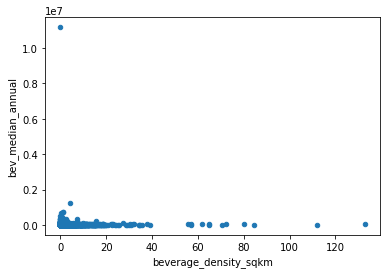

In [0]:
import pandas as pd

df = data.toPandas()
df.plot.scatter(x='beverage_density_sqkm',y='bev_median_annual')